In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and Processing

In [32]:
# loading data
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [15]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [16]:
# print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [17]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [18]:
# getting some basic information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [19]:
# checking the missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [20]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation between columns
1. positive correlation
2. Negative correlation

In [22]:
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract numerical features for correlation calculation
numerical_data = gold_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation = numerical_data.corr()

<Axes: >

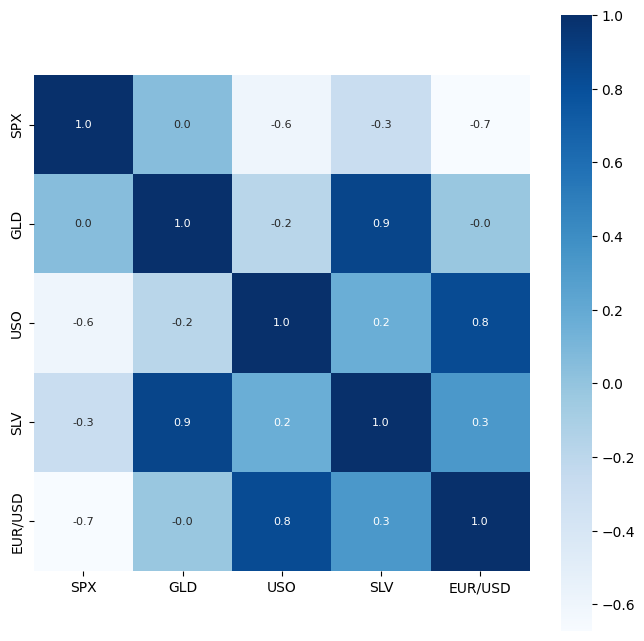

In [23]:
# construction heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [24]:
# COlleration values of GLD
print(correlation ['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-25-b3b01d8d7d48>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

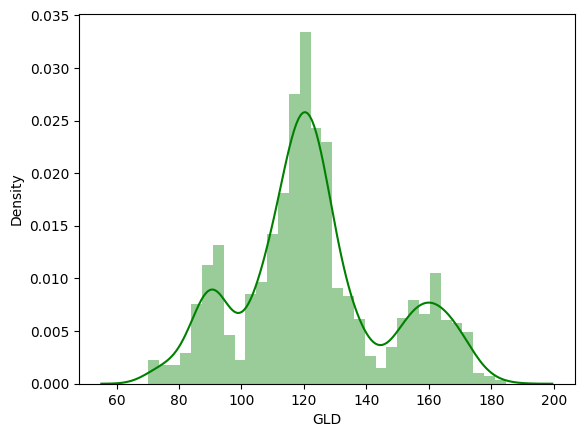

In [25]:
# cheking the distribution of GLD price
sns.distplot(gold_data['GLD'], color='green')

In [26]:
# Splitting the features and target
X = gold_data.drop(['Date','GLD'], axis =1)
Y = gold_data['GLD']

In [27]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test data

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2, random_state=2)

Model Training Random Forest

In [34]:
regressor = RandomForestRegressor(n_estimators=100)

In [35]:
# Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [36]:
# predication on test data
test_data_predication = regressor.predict(X_test)

In [38]:
print(test_data_predication)

[168.50819933  81.82329999 116.17670016 127.71570025 120.63110162
 154.57079834 150.70649881 126.22840035 117.49379897 125.98720091
 116.58600079 171.95610076 142.14189941 167.87569909 115.25260026
 117.61180051 139.68620255 170.3079009  159.66660273 160.4100997
 155.15870049 125.12780035 176.51450021 156.55180348 125.20340037
  93.69299987  77.70309978 120.45160005 119.09789937 167.47929914
  88.09100052 125.30770026  91.04150041 117.68790042 121.10049867
 136.74390178 115.24320111 115.00690061 146.68879976 107.16910127
 104.58340277  87.13659781 126.34200063 117.85629995 153.81749831
 119.6932998  108.47719958 108.15019786  93.17000049 127.06179807
  75.00150045 113.60529972 121.26390008 111.26959899 118.94989901
 120.29939896 158.99179954 168.12100113 147.12499708  85.90869853
  94.21510069  86.73499868  90.49070026 118.9907006  126.33870101
 127.5698995  170.68750049 122.19299943 117.37189883  98.38810032
 168.10910159 142.99489859 132.54510244 121.21340216 120.11149923
 119.702500

In [39]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_predication)
print("R squared error : ", error_score)

R squared error :  0.989362584325268


In [40]:
# Compare the actual and predited values
Y_test = list(Y_test)

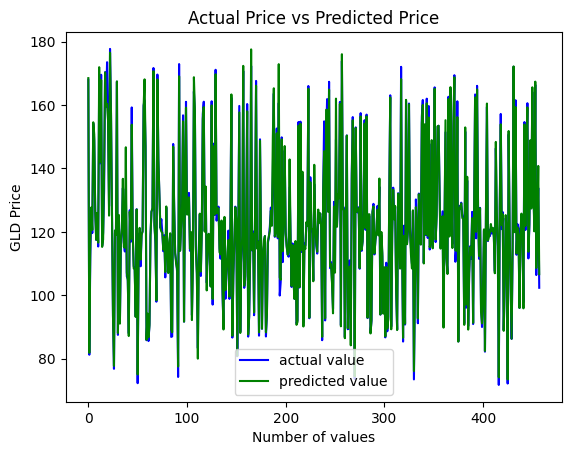

In [43]:
plt.plot(Y_test,color='blue', label='actual value')
plt.plot(test_data_predication,color='green', label='predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()